# Punto 1 (Regresión Lineal)


# $y = \sum_{p=0}^P \phi_p({\bf x}) \alpha_p  + \epsilon\,, \epsilon \sim \mathcal{N}(0,\, \sigma^2)$

\begin{eqnarray}
\underbrace{{\bf y} = 
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}}_{\text{Observations}} \,, 
\underbrace{{\bf X} = 
\begin{bmatrix}
\phi_0({\bf x}_1) & \phi_1({\bf x}_1)  & \ldots & \phi_P({\bf x}_1)  \\
\phi_0({\bf x}_2) & \phi_1({\bf x}_2)  & \ldots & \phi_P({\bf x}_2)  \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0({\bf x}_m) & \phi_1({\bf x}_m)  & \ldots & \phi_P({\bf x}_m)  \\
\end{bmatrix}}_{\text{Design Matrix}} \,,
\underbrace{\boldsymbol{\alpha} = 
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\
\vdots \\
\alpha_m
\end{bmatrix}}_{\text{Parameters}} 
\end{eqnarray}

# $\boldsymbol{\alpha}^{*} = \arg \underset{\boldsymbol{\alpha}}{\min} \, f(\boldsymbol{\alpha})$ where $\boldsymbol{\alpha}^{*} = [{\bf X}^T {\bf X}]^{-1}{\bf X}^T{\bf y}$

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
from io import StringIO
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Primeramente, vamos a tomar como referencia el dataset de Weather History (exclusivo a este punto), con la finalidad de estudiar la posibilidad de predecir la sensación térmica a partir de variables como la humedad.

Link de acceso al dataset: https://www.kaggle.com/datasets/budincsevity/szeged-weather?resource=download

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Actividad3y4_Torrado_Vergara/Punto3/weatherHistory.csv', decimal=".")

De paso aclarar, que para hacer la carga del dataframe, utilizaremos una carpeta de Drive (personal). 

In [ ]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Procedemos a graficar las distintas relaciones que hay entre variables 1 a 1, con la ayuda de pairplot. Con esto, podremos analizar cuales combinaciones de caracteristicas son de interes para modelar alguna otra en especifico.

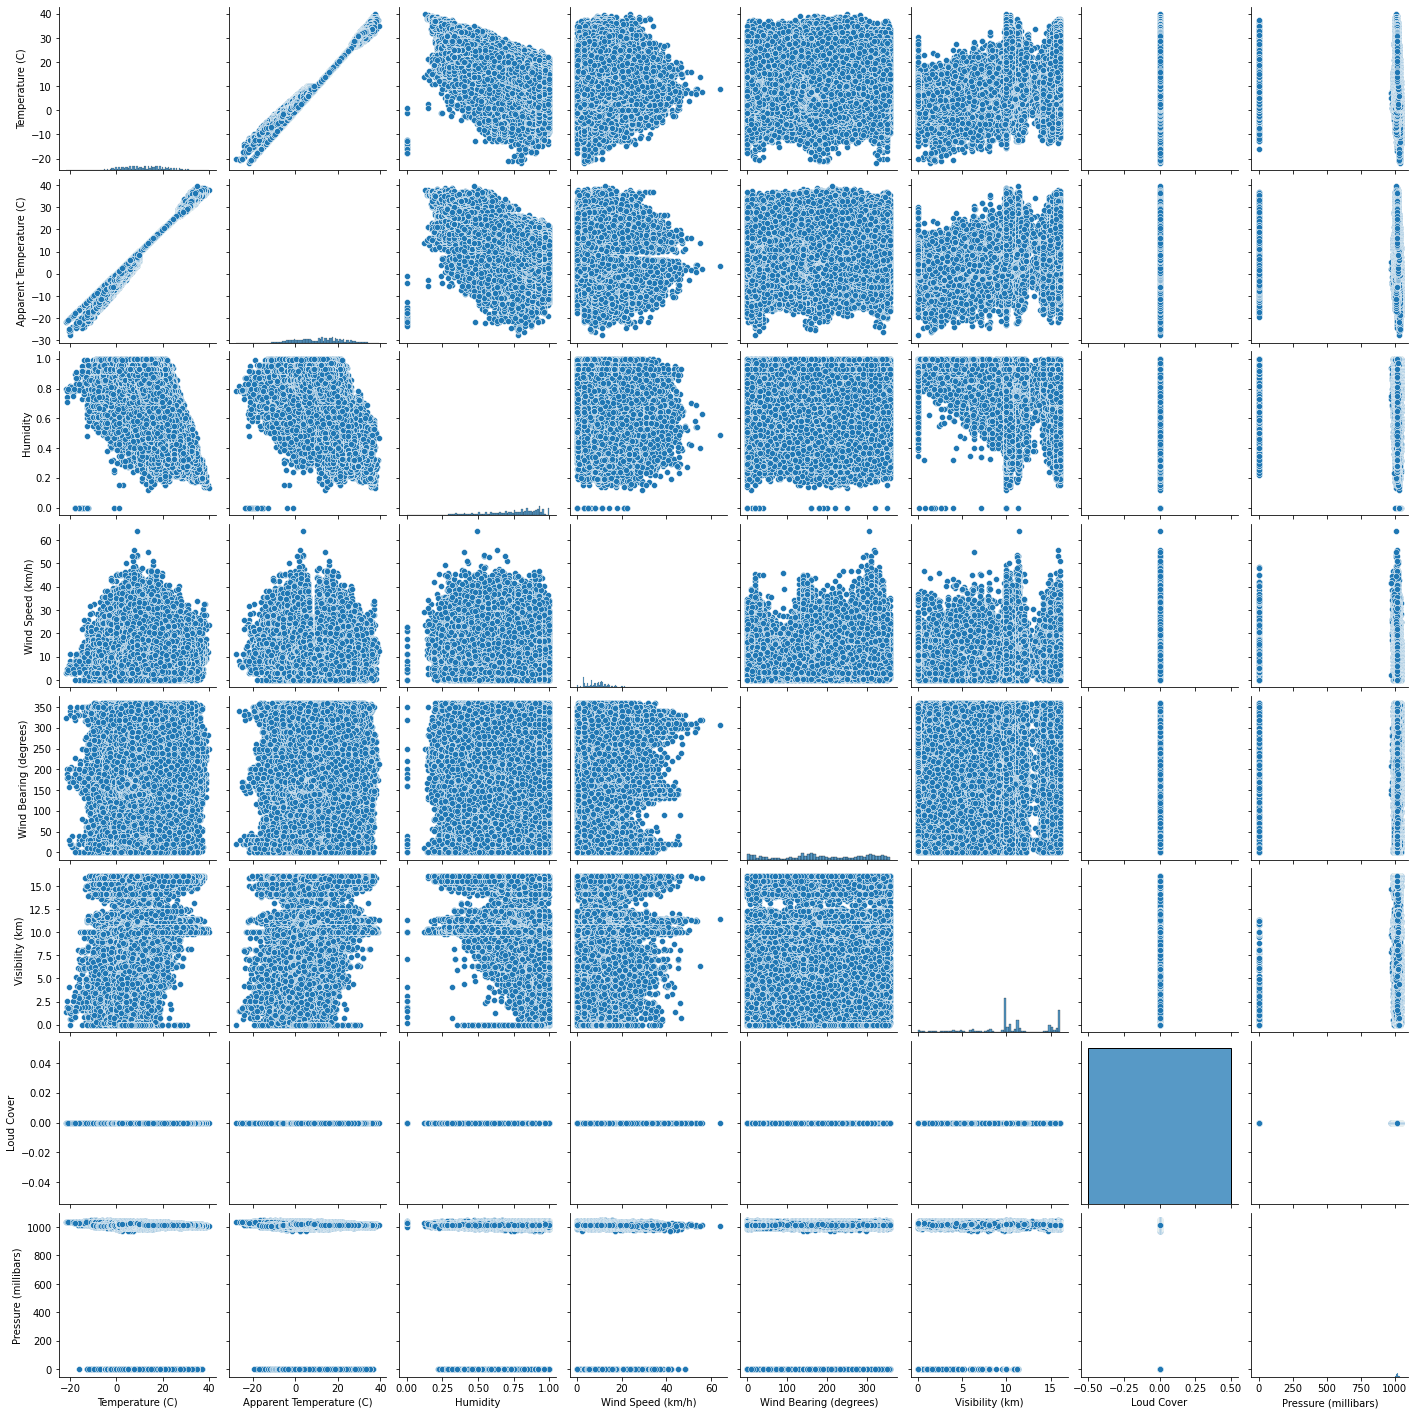

In [ ]:
sns.pairplot(df)

### En busqueda de la comprehensión de distintos fenómenos meteorológicos,se ha intentado buscar la relación existente entre distintas variables intrinsecas en el estudio del clima. Por ende, nos parece interesante poner a prueba los resultados de investigaciones recientes, que tratan de entender estas relaciones como causantes principales. Casualmente, en el estudio referenciado se explica que hay una relación inversamente proporcional entre la velocidad del viento y temperatura con la humedad. Pondremos a prueba las correlaciones halladas, a tráves del desarrollo de un modelo lineal. 

Referencia: Zakaria, N. H. (n.d.). Analysis of Wind Speed, Humidity and Temperature: Variability and Trend in 2017. IOPscience. Retrieved October 26, 2022, from https://iopscience.iop.org/article/10.1088/1755-1315/489/1/012013

### Es interesante ver si puede haber una relación en la que se pueda predecir la humedad, a partir de la velocidad del viento y la temperatura, ya más allá del punto de vista sensorial, se puede apreciar en las gráficas anteriores, como hay algunos ciertos patrones de comportamiento (incluso algunos tipos de clúster) entre estas características.

In [ ]:
x1=df['Wind Speed (km/h)'].to_numpy()
x2=df['Temperature (C)'].to_numpy()

In [ ]:
design=np.array((x1,x2))
design=np.array(design)
samples=np.array(df['Humidity'])
y = samples
X = design.T

In [ ]:
X

array([[14.1197    ,  9.47222222],
       [14.2646    ,  9.35555556],
       [ 3.9284    ,  9.37777778],
       ...,
       [ 8.9838    , 22.03888889],
       [10.5294    , 21.52222222],
       [ 5.8765    , 20.43888889]])

In [ ]:
len(y)

96453

Nos adelantamos un poco, estos serían nuestros alfas optimos (resolviendo linealmente las matrices de diseño y muestras, segun la formula de mínimos cuadrados). 

In [ ]:
alp_opt_act = np.linalg.solve(X.T @ X, X.T @ y)
alp_opt_act

array([0.03698062, 0.01197027])

# Validación Cruzada para Parametros
Para poder medir la validez y en si, la efectividad del modelo, requerimos de bastantes muestras de datos. Sin embargo, al no poder insertar mas datos al dataframe, usaremos la tecnica de validación cruzada para hacer unas separaciones dentro de los datos ya existentes. 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
alp_samples = [];

for step in range(10000):
  Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.3) #random_state=10 (seed random selection of data to split)
  #Train
  alp_opt = np.linalg.solve(Xt.T @ Xt, Xt.T @ yt)
  alp_samples.append(alp_opt)
  
  #Validation
  Ev = yv-Xv@alp_opt

In [ ]:
alp_samples = np.array(alp_samples)

Se genera la matriz de alfas estimados en los 10000 experimentos.

In [ ]:
df_alp = pd.DataFrame(np.round(alp_samples, decimals=10))
alp_opt_est = np.mean(alp_samples, axis=0) #media de los alphas

In [ ]:
alp_opt_est 

array([0.03698014, 0.01197142])

In [ ]:
df_alp.columns = ['alp 1', 'alp 2']

In [ ]:
df_alp

,alp 1,alp 2
0,0.036952,0.011993
1,0.036781,0.012016
2,0.036934,0.011993
3,0.037012,0.011989
4,0.036933,0.012038
...,...,...
9995,0.037048,0.011922
9996,0.037139,0.011922
9997,0.036953,0.011935
9998,0.036880,0.012045


Se grafican los distintos alfas para cada uno de los experimentos.

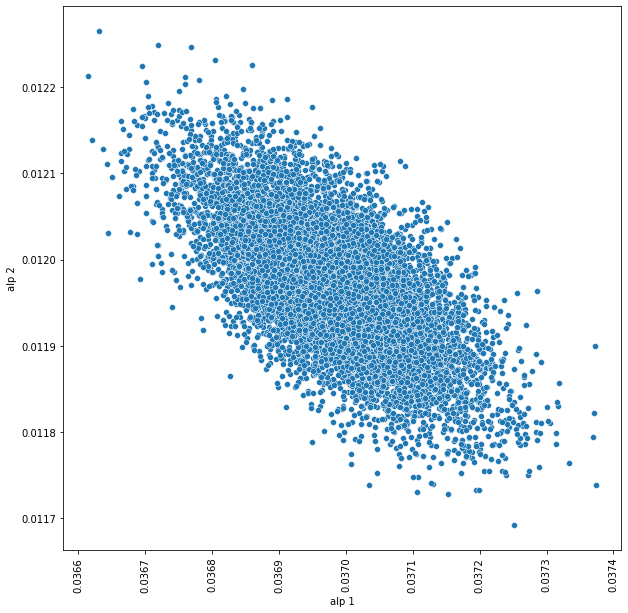

In [ ]:
#Dejar corriendo en la noche
plt.figure(figsize=(10,10))
#sns.stripplot(data=df_alp, x='alp 1', y='alp 2')
sns.scatterplot(data=df_alp, x='alp 1', y='alp 2')
plt.xticks(rotation=90);

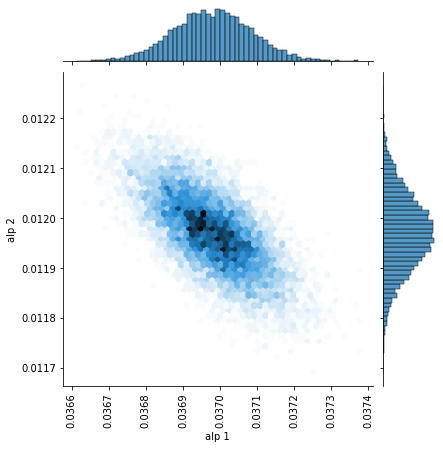

In [ ]:
sns.jointplot(data=df_alp, x='alp 1', y='alp 2', kind='hex')
plt.xticks(rotation=90);

En esta gráfica, se puede apreciar como los alfa optimos estimados, se encuentran demarcados con mayor oscuridad y su distribución normal muestra mayor probabilidad en estos.

## Precisión del modelo

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 1 - We create a model (LinearRegression)
lr = LinearRegression(fit_intercept=True)

# 2 - Train the model
lr_fit = lr.fit(Xt, yt) 

# 3 - Estimate the model accuracy
lr_fit.score(Xv, yv)

0.44172491506013367

In [ ]:
lr_fit.coef_ #coef_ gives you an array of weights estimated by linear regression

array([-0.00620138, -0.0129343 ])

In [ ]:
lr_fit.intercept_

0.9564143294130947

# Validación cruzada para estimación de precisión

Utilizamos la validación cruzada con scikit_learn, para poder comprobar la veracidad del resultado anterior o que tanto varian las precisiones en un numero determinado de experimentos.

In [ ]:
acc = [];
lr = LinearRegression()
for step in range(10000):
  Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.3) #random_state=10 (seed random selection of data to split)
  #Train
  lr_fit = lr.fit(Xt, yt) 

  # Estimate the model accuracy
  acc_p = lr_fit.score(Xv, yv)

  acc.append(acc_p)

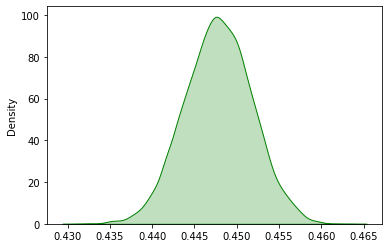

In [ ]:
acc = np.array(acc)

sns.kdeplot(acc, fill=True, color='green')

Como se puede apreciar, la precisión del modelo tiende a ser generalmente de 44.5%, con un rango de entre 43% al 46.5%. Ciertamente, podemos apreciar que no es modelo fiable, ya que cuenta con menos probabilidad de hacer una predicción correcta, que si adivinaramos (50%). Esto indica que la combinación lineal de las variables (velocidad del viento y temperatura) tomadas para predecir el comportamiento de la humedad, no son las indicadas.

#Predicción

Ejemplificando lo recien mencionado en la sección anterior, procederemos a hacer predicciones con los datos de prueba.

In [ ]:
y_pred=lr_fit.predict(Xv)
y_pred

array([0.81848729, 0.76673638, 0.598276  , ..., 0.77673471, 0.60669014,
       0.80099664])

Tras haber realizado las predicciones, podemos estimar el error del modelo.

In [ ]:
error_estimado = yv - lr_fit.predict(Xv) 
error_estimado

array([0.05151271, 0.11326362, 0.021724  , ..., 0.10326529, 0.34330986,
       0.01900336])

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':yv, 'Predicted Value':y_pred, 'Difference':error_estimado})
pred_y_df

,Actual Value,Predicted Value,Difference
0,0.87,0.818487,0.051513
1,0.88,0.766736,0.113264
2,0.62,0.598276,0.021724
3,0.71,0.708502,0.001498
4,0.57,0.653596,-0.083596
...,...,...,...
28931,0.83,0.878427,-0.048427
28932,0.92,0.771859,0.148141
28933,0.88,0.776735,0.103265
28934,0.95,0.606690,0.343310


# Validación cruzada para estimación de errores

En esta sección mostraremos la distribución de los errores en un numero preestablecido de experimentos.

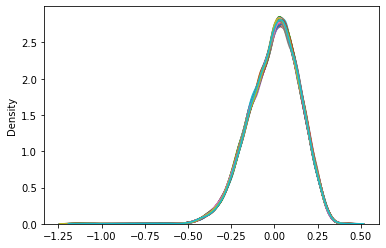

In [ ]:
errors = [];
lr = LinearRegression()
for step in range(100):
  Xt, Xv, yt, yv = train_test_split(X, y, test_size=0.3) #random_state=10 (seed random selection of data to split)

  #Train - Here we solve the optimization
  lr_fit = lr.fit(Xt, yt) # - (XT @ X)^{-1} XT y

  # Estimate the errors
  err_p = yv - lr_fit.predict(Xv)
  sns.kdeplot(err_p)

# Gráfica Multilinealidad

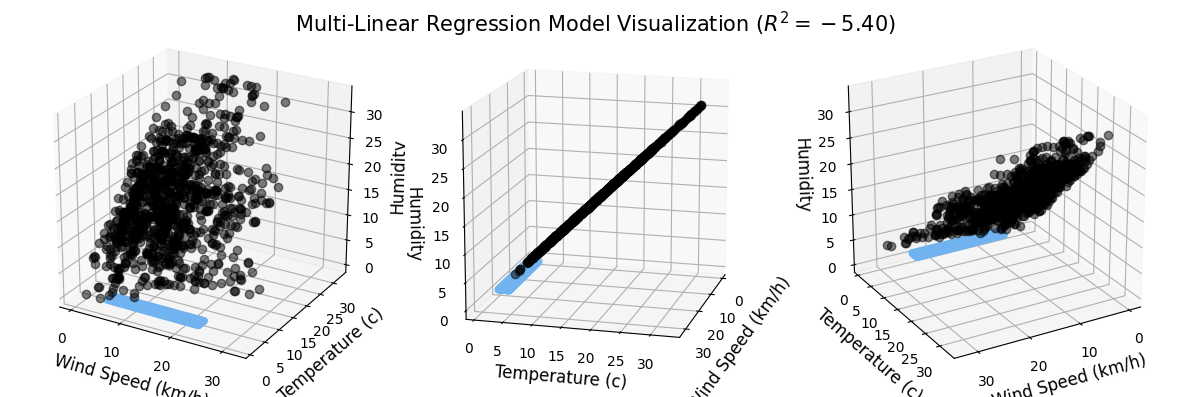

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('/content/gdrive/MyDrive/Actividad3y4_Torrado_Vergara/Punto3/weatherHistory.csv', decimal=".", nrows=1000)
x1=df['Wind Speed (km/h)'].to_numpy()
x2=df['Temperature (C)'].to_numpy()
design=np.array((x1,x2))
design=np.array(design)
samples=np.array(df['Humidity'])
y = samples
X = design.T
x = X[:, 0]
y = X[:, 1]
z = y

x_pred = np.linspace(6, 24, 30)      # range of porosity values
y_pred = np.linspace(0.93, 2.9, 30)  # range of VR values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

predicted = lr_fit.predict(model_viz)

############################################## Evaluate ############################################

r2 = lr_fit.score(X, y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Wind Speed (km/h)', fontsize=12)
    ax.set_ylabel('Temperature (c)', fontsize=12)
    ax.set_zlabel('Humidity', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=15, color='k')

fig.tight_layout()

# Conclusión
Tras haber realizado este punto, queda bastante claro que las variables no contaban con una relación evidente, lo cual no nos permite predecir comportamientos entre los mismos. Ahora bien, lo interesante partiendo de lo recien mencionado, es apreciar como los modelos lineales no siempre van a cumplir o comportarse de la manera en la que se espera. 

Tal y como se menciono al principio, la idea de modelar estos datos en una regresión lineal, era para comprobar si se cumplia lo mencionado en el estudio de las tormentas de arena de Malasia en 2017. Los estudios comprobaron con estudios de mutlicolinealidad que la temperatura y la velocidad del viento eran directamente proporcionales, mientras la humedad era inversamente proporcionales a ambas. Sin embargo, nuestro modelo no se acerco ni remotamente a esos resultados. Esto demuestra, que a la hora de realizar modelos en el mundo real, la toma o recolección de datos siempre sera susceptible a perturbaciones que conllevaran a errores de distinta gravedad.

Finalmente, el método científico antepone su universalidad, dejandónos en evidencia como un solo experimento o investigación, no es ni sera suficiente para poder corroborar o desestimar cualquier tipo de afirmación.

# Punto 2

# **Problema**

Recorrer 1000 ciudades del mundo en avión, recorriendo la menor distancia posible con el objetivo de para ahorrar combustible. 

El dataset que se utilizó cuenta con un poco más de 40000 ciudades de todos los continentes del mundo. Se puede encontrar a través del siguiente enlace.
https://simplemaps.com/data/world-cities

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data_c = pd.read_csv('worldcities.csv', header=0, sep=',')
data_c

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [ ]:
# latitud = x, longitud = y
points = data_c[["lng","lat"]].values # extracción de coordenadas

In [ ]:
points = points[:2000] # selección de 1000 ciudades
points

array([[139.7744,  35.6839],
       [106.8451,  -6.2146],
       [ 77.2167,  28.6667],
       ...,
       [ 39.9   ,  59.2167],
       [ 45.1833,  54.1833],
       [-88.1162,  30.6783]])

In [ ]:
# Para comparar despues de ejecución
costos = {'Nearest Neighbor': 0,
          'Tabu Search': 0,
          'Simulated Annealing': 0
          }

A continuación se encuentran las 2000 ciudades seleccionadas. Se tomaron las coordenadas en términos de latitud y longitud de cada una para graficarlas utilizando matplotlib. El punto rojo representa Barranquilla, el cual se encontró realizando un query al dataset.

In [ ]:
data_c.query('country == "Colombia" and city == "Barranquilla"')

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
543,Barranquilla,Barranquilla,10.9639,-74.7964,Colombia,CO,COL,Atlántico,admin,1274250.0,1170179113


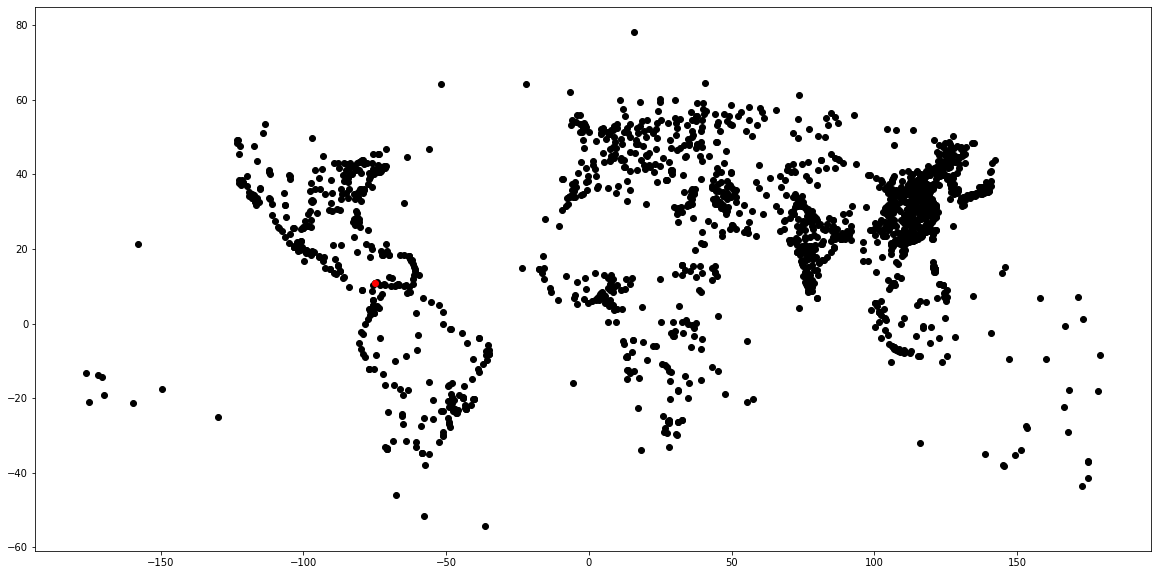

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(points[:,0], points[:,1], 'ok')
plt.plot(points[543,0], points[543,1], 'or') # En rojo, Barranquilla

## **Matriz de Costos**

In [ ]:
N = len(points) 
M = np.zeros((N,N))
for i in range(N):
  for j in range(i+1,N):
    p1 = points[i,:] 
    p2 = points[j,:] 

    M[i,j] = np.sqrt(np.sum((p1-p2)**2)) 
    M[j,i] = M[i,j] 

# **Nearest Neighbor**

In [ ]:
def cost_function(M, sol):
  N = len(sol)
  s = 0
  global routes_ind
  routes_ind=[]
  for i in range(N-1):
    s += M[sol[i], sol[i+1]]
    routes_ind.append(M[sol[i], sol[i+1]])
  return s

A continuación, se realiza la heurística del vecino mas cercano, iniciando en la ciudad de Barranquilla.

In [ ]:
c1 = 543 # Barranquilla
novisited = np.array([True]*N)
novisited[c1] = False
cn = c1
route = [cn]

while novisited.any():
  candidates = np.where(novisited)[0]
  cn = np.argmin(M[cn, candidates])
  cn = candidates[cn]
  novisited[cn] = False
  route.append(cn)

route.append(c1)
route = np.array(route)

cost_route = cost_function(M, route)
costos['Nearest Neighbor'] = round(cost_route)

In [ ]:
cost_route

4334.970484573063

In [ ]:
max_p = routes_ind.index(max(routes_ind))

A continuación se encuentra la solución de manera gráfica. En todas las gráficas mostradas aparecerá una <font color="A82DFC">linea morada</font> que marca la distancia más larga que existe entre dos puntos de la solución. Además, el <font color="FF0000">punto rojo</font> y la <font color="FF0000">linea roja</font> representan el punto de partida y el salto inicial

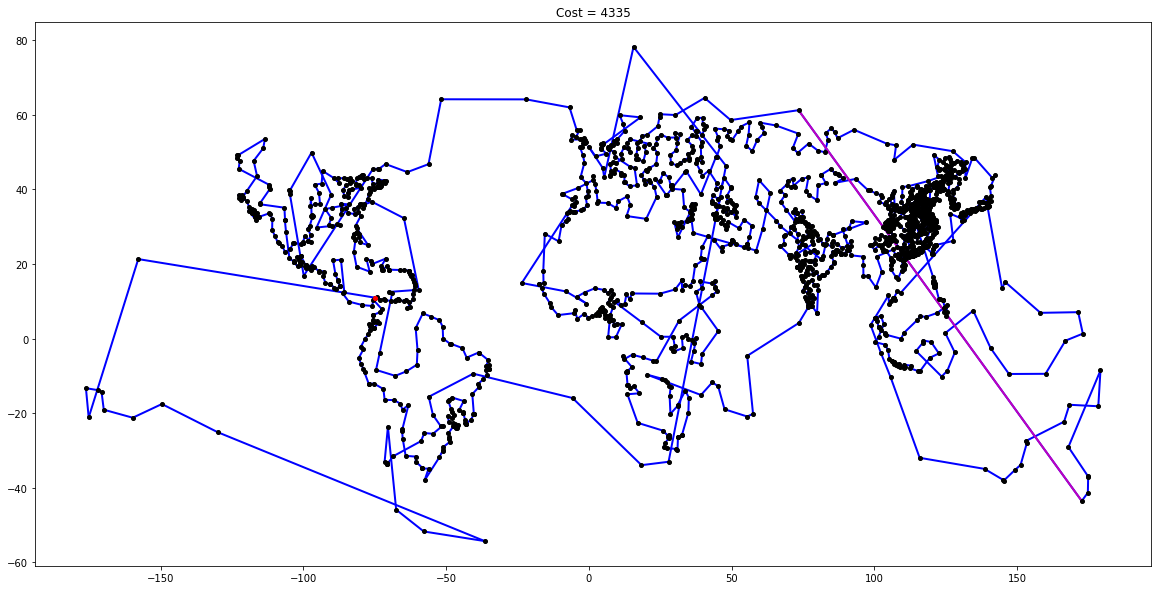

In [ ]:
plt.figure(figsize=(20,10))
for i in range(N):
  plt.plot([points[route[i],0], points[route[i+1],0]], 
           [points[route[i],1], points[route[i+1],1]],
           '-b', lw=2)
  
  
# Distancia mas larga entre un par de puntos
plt.plot([points[route[max_p],0], points[route[max_p+1],0]], 
          [points[route[max_p],1], points[route[max_p+1],1]],
          '-m', lw=2)
plt.plot([points[route[max_p+1],0], points[route[max_p+1],0]], 
          [points[route[max_p+1],1], points[route[max_p+1],1]],
          '-m', lw=2)

# Primer salto
plt.plot([points[route[0],0], points[route[1],0]], 
           [points[route[0],1], points[route[1],1]],
           '-r', lw=2)
plt.plot([points[route[1],0], points[route[1],0]], 
           [points[route[1],1], points[route[1],1]],
           '-r', lw=2)

plt.plot(points[:,0], points[:,1], 'ok', ms=4)
plt.plot(points[c1,0], points[c1,1], 'or', ms=4)
plt.title(f'Cost = {round(cost_route)}');


# **Tabu Search**

Se realizaron 100000 iteraciones para realizar los algoritmos de búsqueda tabú y recocido simulado. Realizar más iteraciones resultará en tiempos de espera mucho mas demorados.

In [ ]:
Z = 100000 
r = np.arange(N+1)
r[-1] = r[0]
cost_opt = cost_function(M, r)
f_r = []
for i in range(Z):
  f_r.append(cost_opt)
  c1 = np.random.randint(N) 
  c2 = np.random.randint(N) 
  r[c1], r[c2] = r[c2], r[c1]
  cost_r = cost_function(M, r)
  if cost_r < cost_opt:
    cost_opt = cost_r
  else:
    r[c2], r[c1] = r[c1], r[c2]

f_r = np.array(f_r)
costos['Tabu Search'] = round(cost_opt)

In [ ]:
cost_opt

46843.38586377613

In [ ]:
max_p = routes_ind.index(max(routes_ind))

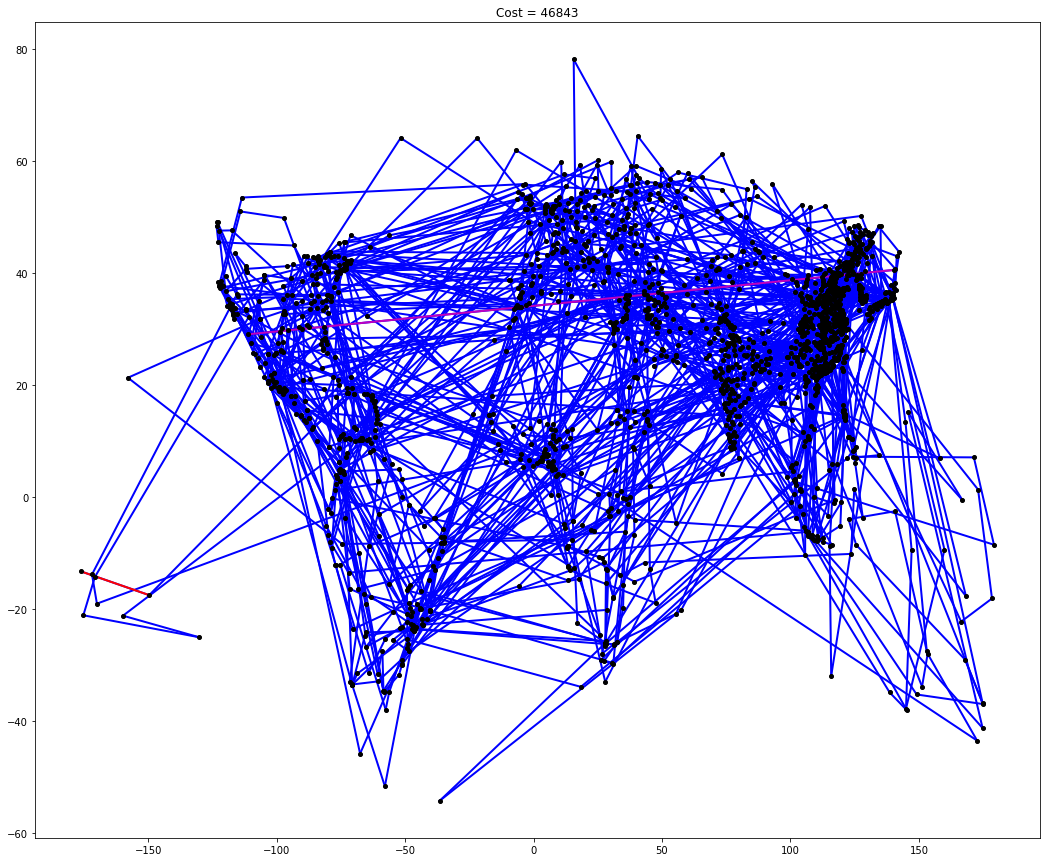

In [ ]:
route = r
plt.figure(figsize=(18,15))
for i in range(N):
  plt.plot([points[route[i],0], points[route[i+1],0]], 
           [points[route[i],1], points[route[i+1],1]],
           '-b', lw=2)

# Distancia mas larga entre un par de puntos
plt.plot([points[route[max_p],0], points[route[max_p+1],0]], 
          [points[route[max_p],1], points[route[max_p+1],1]],
          '-m', lw=2)
plt.plot([points[route[max_p+1],0], points[route[max_p+1],0]], 
          [points[route[max_p+1],1], points[route[max_p+1],1]],
          '-m', lw=2)

# Primer salto
plt.plot([points[route[0],0], points[route[1],0]], 
           [points[route[0],1], points[route[1],1]],
           '-r', lw=2)
plt.plot([points[route[1],0], points[route[1],0]], 
           [points[route[1],1], points[route[1],1]],
           '-r', lw=2)

plt.plot(points[:,0], points[:,1], 'ok', ms=4)
plt.title(f'Cost = {round(cost_opt)}');

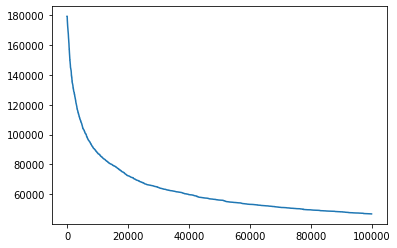

In [ ]:
plt.plot(f_r);

# **Recocido Simulado**

In [ ]:
Z = 100000 
r = np.arange(N+1)
r[-1] = r[0]
cost_opt = cost_function(M, r)
f_r = []
T = 1000;
p_cooling_factor = 0.99 
for i in range(Z):
  f_r.append(cost_opt)
  c1 = np.random.randint(N) 
  c2 = np.random.randint(N) 
  r[c1], r[c2] = r[c2], r[c1]
  r[-1] = r[0]
  cost_r = cost_function(M, r)
  x = cost_r - cost_opt
  p = np.exp(-x/T)
  if p > np.random.rand():
    cost_opt = cost_r
  else:
    r[c2], r[c1] = r[c1], r[c2]
    r[-1] = r[0]
  
  T = p_cooling_factor * T

f_r = np.array(f_r)
costos['Simulated Annealing'] = round(cost_opt)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()


In [ ]:
cost_opt

46034.8124993469

In [ ]:
max_p = routes_ind.index(max(routes_ind))

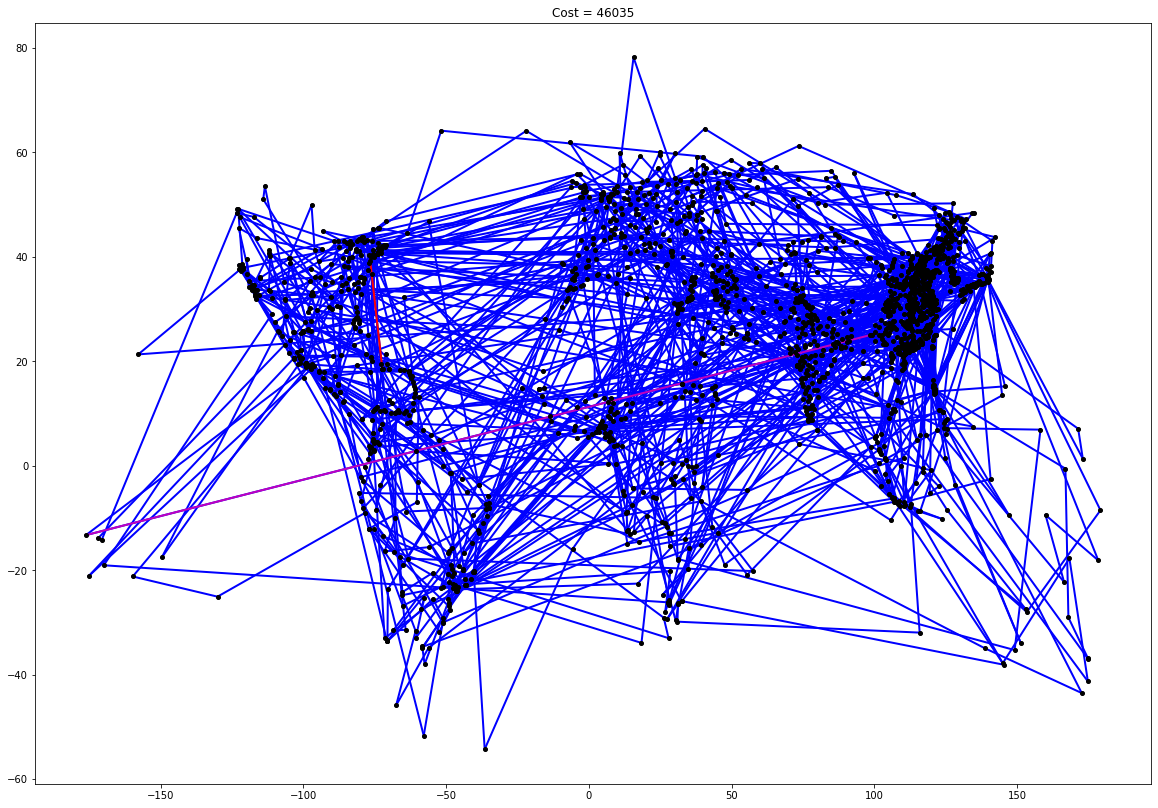

In [ ]:
route = r
plt.figure(figsize=(20,14))
for i in range(N):
  plt.plot([points[route[i],0], points[route[i+1],0]], 
           [points[route[i],1], points[route[i+1],1]],
           '-b', lw=2)

# Distancia mas larga entre un par de puntos (en morado)
plt.plot([points[route[max_p],0], points[route[max_p+1],0]], 
          [points[route[max_p],1], points[route[max_p+1],1]],
          '-m', lw=2)
plt.plot([points[route[max_p+1],0], points[route[max_p+1],0]], 
          [points[route[max_p+1],1], points[route[max_p+1],1]],
          '-m', lw=2)

# Primer salto (en rojo)
plt.plot([points[route[0],0], points[route[1],0]], 
           [points[route[0],1], points[route[1],1]],
           '-r', lw=2)
plt.plot([points[route[1],0], points[route[1],0]], 
           [points[route[1],1], points[route[1],1]],
           '-r', lw=2)
plt.plot(points[:,0], points[:,1], 'ok', ms=4)
plt.title(f'Cost = {round(cost_opt)}');

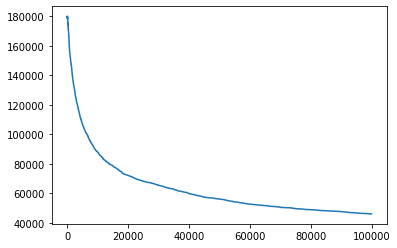

In [ ]:
plt.plot(f_r);

# **Comparaciones**

In [ ]:
costos['Nearest Neighbor'] # Nearest Neighbor

4335

In [ ]:
costos['Tabu Search'] # Busqueda Tabu

46843

In [ ]:
costos['Simulated Annealing'] # Recocido Simulado

46035

Algoritmo con menor costo

In [ ]:
min(costos, key=costos.get)

'Nearest Neighbor'

Algoritmo de mayor costo

In [ ]:
max(costos, key=costos.get)

'Tabu Search'

Luego de realizar multiples ejecuciones de lo anterior, se pudo ver que el algoritmo que arroja un **menor costo** es siempre el de la **heurística del vecino mas cercano**. Sin embargo, **todos los algoritmos logran resolver el problema**. 

Al realizar varias ejecuciones del algoritmo de búsqueda Tabú y de recocido simulado, se evidencia que arrojan resultados muy similares.

Agregar más iteraciones a cualquiera de los dos algoritmos anteriormente mencionados crea tiempos de espera más altos de lo normal. Además, la diferencia entre sus resultados es baja.

En base a los resultados obtenidos, se concluye que en este experimento el algoritmo del vecino más cercano es mejor que el búsqueda tabú y el recocido simulado. Al haber mas ciudades, se notará más la diferencia entre los resultados de estos algoritmos. 